## 22K-8708 (Arman Faisal)
## 22K-4085 (M. Sheharyar)

# ------------------------ STOCK PRICE PREDICTION ANALYSIS ------------------------

# IMPORTING LIBRARIES

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

# FETCHING STOCK DATA

In [2]:
def fetch_stock_data(ticker, period="1mo", interval="1d"):
    stock_data = yf.Ticker(ticker)
    df = stock_data.history(period=period, interval=interval)
    return df


# PREPARING DATA

In [4]:
def prepare_data(df):
    df['Price_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    df.dropna(inplace=True)

    X = df[['Open', 'High', 'Low', 'Volume']]
    y_reg = df['Close']  
    y_class = df['Price_Up'] 
    return X, y_reg, y_class


# REGRESSION AND CLASSIFICATION MODELS

In [5]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test

def train_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model, X_test, y_test

# PLOTTING THE STOCK TRENDS CHART

In [6]:
def plot_stock_prices(df, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Close'], label=f'{company_name} Stock Prices', color='blue', linewidth=3)
    plt.title(f'{company_name} PRICE TREND', fontsize=20)
    plt.xlabel('DATE', fontsize=15)
    plt.ylabel('PRICES IN USD', fontsize=15)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


# EVALUATING MODEL PERFORMANCES

In [8]:
def evaluate_models(company_name):
    
    X, y_reg, y_class = prepare_data(fetch_stock_data(company_name))

    reg_model, X_test_reg, y_test_reg = train_regression_model(X, y_reg)
    y_pred_reg = reg_model.predict(X_test_reg)

    clf_model, X_test_clf, y_test_clf = train_classification_model(X, y_class)
    y_pred_clf = clf_model.predict(X_test_clf)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    print("REGRESSION METRICS:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R^2): {r2}")

# INVESTMENT RECOMMENDATION




----------------------------------------- STOCK PRICE PREDICTION -------------------------------------------------------





ENTER COMPANY NAME (ticker name):  AAPL



DISPLAYING DATA FOR THE COMPANY:
╒═══════════════════════════╤════════╤════════╤════════╤═════════╤═════════════╤═════════════╤════════════════╕
│ Date                      │   Open │   High │    Low │   Close │      Volume │   Dividends │   Stock Splits │
╞═══════════════════════════╪════════╪════════╪════════╪═════════╪═════════════╪═════════════╪════════════════╡
│ 2024-11-14 00:00:00-05:00 │ 225.02 │ 228.87 │ 225    │  228.22 │ 4.49239e+07 │           0 │              0 │
├───────────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┼────────────────┤
│ 2024-11-15 00:00:00-05:00 │ 226.4  │ 226.92 │ 224.27 │  225    │ 4.79237e+07 │           0 │              0 │
├───────────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┼────────────────┤
│ 2024-11-18 00:00:00-05:00 │ 225.25 │ 229.74 │ 225.17 │  228.02 │ 4.4686e+07  │           0 │              0 │
├───────────────────────────┼────────┼────────┼────────┼─────────┼────

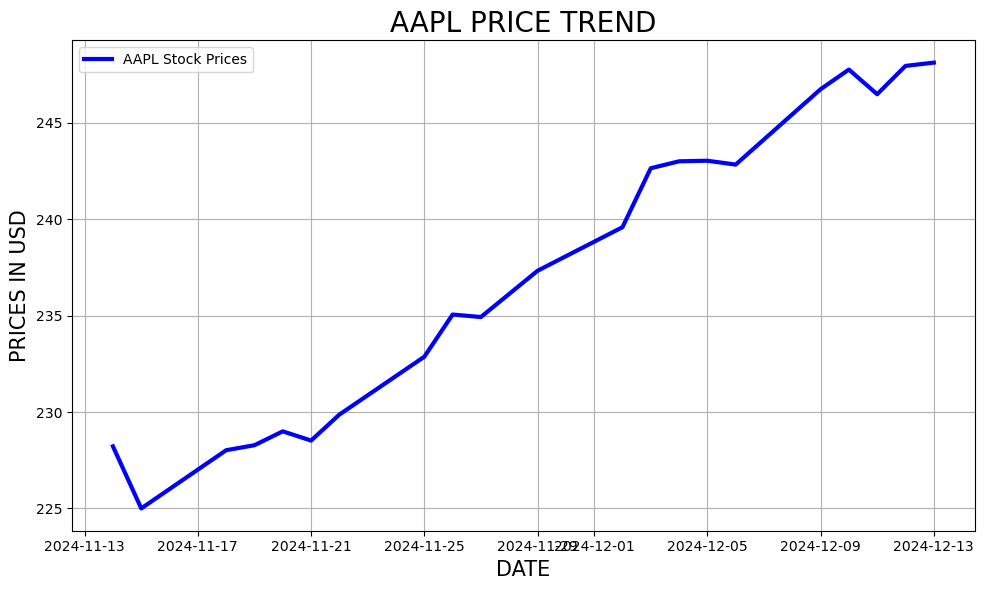





EVALUATION METRICS:

REGRESSION METRICS:
Mean Squared Error (MSE): 0.4809491864317309
R-squared (R^2): 0.9934561908154363


In [10]:
def main():
    print("\n\n\n----------------------------------------- STOCK PRICE PREDICTION -------------------------------------------------------")
    company = input("\n\n\nENTER COMPANY NAME (ticker name): ").strip().upper()

    try:
        df = fetch_stock_data(company)
        
        print("\nDISPLAYING DATA FOR THE COMPANY:")
        print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
        
        X, y_reg, y_class = prepare_data(df)

        reg_model, X_test_reg, y_test_reg = train_regression_model(X, y_reg)
        class_model, X_test_class, y_test_class = train_classification_model(X, y_class)

        reg_prediction = reg_model.predict(X_test_reg.iloc[:1])
        class_prediction = class_model.predict(X_test_class.iloc[:1])

        print(f"\n\n\nPREDICTED PRICES FOR TOMORROW: ${reg_prediction[0]:.2f}")
        print(f"\nINVESTMENT RECOMMENDATION: {'Invest' if class_prediction[0] == 1 else 'Do Not Invest'}")

        print("\n\n\nStock Price Trend: ")
        plot_stock_prices(df, company)

        print("\n\n\n\nEVALUATION METRICS:\n")
        evaluate_models(company)


    except ValueError as ve:
        print(f"Value Error: {ve}")
        
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
